# Importing the Dependencies

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Data Collection and Processing

In [2]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('/content/dataset.csv')

In [3]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [4]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [6]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# number of missing values in each column
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [8]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [9]:
# number of missing values in each column
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [10]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

/tmp/ipython-input-474101102.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [11]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [12]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [13]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [14]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


# Data Visualiztion

<Axes: xlabel='Education', ylabel='count'>

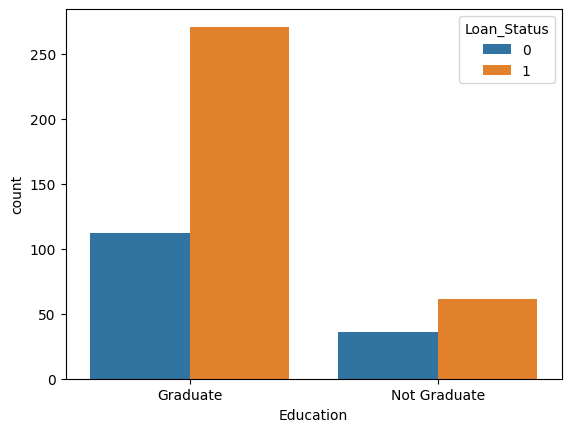

In [15]:
# education and loan status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

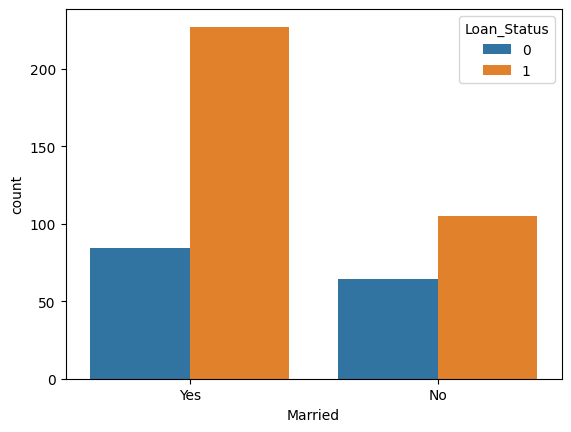

In [16]:
# marital status and loan status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [24]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1, 'Urban':2}, 'Education':{'Graduate':1, 'Not Graduate':0}}, inplace=True)

/tmp/ipython-input-1446719479.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},


In [25]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [27]:
# separating the data and lable
X = loan_dataset.drop(columns=['Loan_ID', 'Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [28]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

# Train Test Split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


# Training the model: Support Vector Machine (SVM)

In [31]:
classifier = svm.SVC(kernel='linear')

In [32]:
# training the support vector machine model
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

# Model Evaluation

In [33]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [34]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7986111111111112


In [35]:
# accuracy score on tes data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [37]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8333333333333334


# Making Prediction

In [40]:
y_pred = classifier.predict(X_test)
print(y_pred[:10])   # first 10 predictions

[1 1 1 1 1 1 1 1 1 1]


In [53]:
# Example: first row of test set
single_pred = classifier.predict(X_test.iloc[[0]])[0]
print("Prediction:", "Approved" if single_pred==1 else "Not Approved")

Prediction: Approved


# Confusion Matrix + Classification Report (+ nice plot)

Classification report:
               precision    recall  f1-score   support

           0      0.818     0.600     0.692        15
           1      0.838     0.939     0.886        33

    accuracy                          0.833        48
   macro avg      0.828     0.770     0.789        48
weighted avg      0.832     0.833     0.825        48



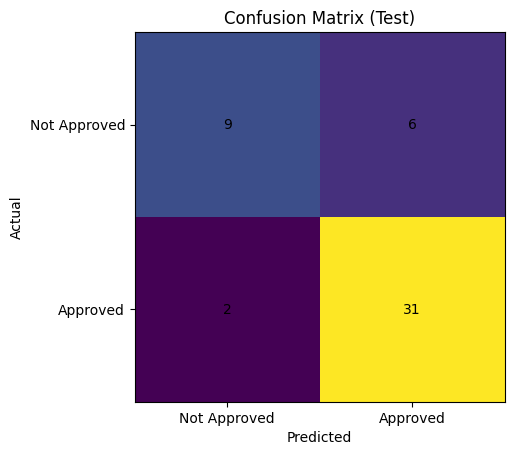

In [47]:
aitcm = confusion_matrix(Y_test, X_test_prediction)
print("Classification report:\n",
      classification_report(Y_test, X_test_prediction, digits=3))

# Simple confusion-matrix heatmap
fig, ax = plt.subplots()
im = ax.imshow(cm)
ax.set_title("Confusion Matrix (Test)")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_xticks([0,1]); ax.set_yticks([0,1])
ax.set_xticklabels(["Not Approved","Approved"])
ax.set_yticklabels(["Not Approved","Approved"])

# label each cell
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center")
plt.show()

In [49]:
# Predicton for New applicant
import pandas as pd

new_applicant = {
    "Gender":1,
    "Married":1,
    "Dependents":0,
    "Education":1,
    "Self_Employed":0,
    "ApplicantIncome":4000,
    "CoapplicantIncome":1500,
    "LoanAmount":120,
    "Loan_Amount_Term":360,
    "Credit_History":1,
    "Property_Area":2
}

new_df = pd.DataFrame([new_applicant])
new_df = new_df.reindex(columns=X_train.columns, fill_value=0)  # keep column order same

pred = classifier.predict(new_df)[0]
print("New applicant loan status:", "Approved" if pred==1 else "Not Approved")

New applicant loan status: Approved


In [51]:
print("Model features:", list(X_train.columns))

Model features: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
